In [1]:
#TAsk 2: Importing datasets and libraries

In [2]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [4]:
stock_price_df=pd.read_csv('/content/stock.csv')
stock_volume_df=pd.read_csv('/content/stock_volume.csv')

In [5]:
#reading the stock prices
stock_price_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [6]:
#Reading the stock volume
stock_volume_df

Date      AAPL        BA         T       MGM     AMZN      IBM  \
0     2012-01-12  53146800   3934500  26511100  17891100  5385800  6881000   
1     2012-01-13  56505400   4641100  22096800  16621800  4753500  5279200   
2     2012-01-17  60724300   3700100  23500200  15480800  5644500  6003400   
3     2012-01-18  69197800   4189500  22015000  18387600  7473500  4600600   
4     2012-01-19  65434600   5397300  25524000  14022900  7096000  8567200   
...          ...       ...       ...       ...       ...      ...      ...   
2154  2020-08-05  30498000  46551000  22991700  18914200  3930000  3675400   
2155  2020-08-06  50607200  32921600  21908700  35867700  3940600  3417100   
2156  2020-08-07  49453300  19301600  30398500  34530300  3929600  3651000   
2157  2020-08-10  53100900  35857700  35514400  71219700  3167300  3968300   
2158  2020-08-11  46871100  60966900  30978300  34357900  3706600  4998500   

         TSLA      GOOG       sp500  
0      729300   3764400  4019890000  
1     5500400   4631800  3692370000  
2     4651600   3832800  4010490000  
3     1260200   5544000  4096160000  
4     1246300  12657800  4465890000  
...       ...       ...         ...  
2154  4978000   1979500  4732220000  
2155  5992300   1995400  4267490000  
2156  8883500   1576600  4104860000  
2157  7522300   1289300  4318570000  
2158  8356000   1452000  5087650000  

[2159 rows x 10 columns]

In [7]:
#Sorting the stock price by date
stock_price_df.sort_values(by=['Date'], inplace= True)

In [8]:
stock_price_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [9]:
#Sorting the stock volume by date
stock_volume_df.sort_values(by=['Date'], inplace= True)

In [10]:
stock_volume_df

Date      AAPL        BA         T       MGM     AMZN      IBM  \
0     2012-01-12  53146800   3934500  26511100  17891100  5385800  6881000   
1     2012-01-13  56505400   4641100  22096800  16621800  4753500  5279200   
2     2012-01-17  60724300   3700100  23500200  15480800  5644500  6003400   
3     2012-01-18  69197800   4189500  22015000  18387600  7473500  4600600   
4     2012-01-19  65434600   5397300  25524000  14022900  7096000  8567200   
...          ...       ...       ...       ...       ...      ...      ...   
2154  2020-08-05  30498000  46551000  22991700  18914200  3930000  3675400   
2155  2020-08-06  50607200  32921600  21908700  35867700  3940600  3417100   
2156  2020-08-07  49453300  19301600  30398500  34530300  3929600  3651000   
2157  2020-08-10  53100900  35857700  35514400  71219700  3167300  3968300   
2158  2020-08-11  46871100  60966900  30978300  34357900  3706600  4998500   

         TSLA      GOOG       sp500  
0      729300   3764400  4019890000  
1     5500400   4631800  3692370000  
2     4651600   3832800  4010490000  
3     1260200   5544000  4096160000  
4     1246300  12657800  4465890000  
...       ...       ...         ...  
2154  4978000   1979500  4732220000  
2155  5992300   1995400  4267490000  
2156  8883500   1576600  4104860000  
2157  7522300   1289300  4318570000  
2158  8356000   1452000  5087650000  

[2159 rows x 10 columns]

In [11]:
#Checking for null values for stock prices
print(stock_price_df.isnull().sum())

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64


In [12]:
#No Null values for stock prices

In [13]:
#Checking for null values for stock volume
print(stock_volume_df.isnull().sum())

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64


In [14]:
#No Null values for stock volumes

In [15]:
#Stock prices dataframe info
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [16]:
#Stock volumes dataframe info
stock_volume_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 185.5+ KB


In [17]:
#Mini challenge 1
stock_volume_df['AAPL'].describe()

count    2.159000e+03
mean     5.820332e+07
std      4.568141e+07
min      1.136200e+07
25%      2.769930e+07
50%      4.209420e+07
75%      7.182480e+07
max      3.765300e+08
Name: AAPL, dtype: float64

In [18]:
#Average trading volume for AAPL = 5.820332e+07

In [19]:
stock_volume_df['sp500'].describe()

count    2.159000e+03
mean     3.680732e+09
std      8.622717e+08
min      1.248960e+09
25%      3.211890e+09
50%      3.526890e+09
75%      3.933290e+09
max      9.044690e+09
Name: sp500, dtype: float64

In [20]:
#Maximum trading volume for sp500 = 9.044690e+09

In [21]:
stock_volume_df.describe()

AAPL            BA             T           MGM          AMZN  \
count  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03   
mean   5.820332e+07  6.419916e+06  2.832131e+07  9.845582e+06  4.102673e+06   
std    4.568141e+07  9.711873e+06  1.428911e+07  7.295753e+06  2.290722e+06   
min    1.136200e+07  7.889000e+05  6.862400e+06  9.507000e+05  8.813000e+05   
25%    2.769930e+07  3.031850e+06  2.002150e+07  5.796450e+06  2.675700e+06   
50%    4.209420e+07  3.991000e+06  2.485930e+07  7.899800e+06  3.494800e+06   
75%    7.182480e+07  5.325900e+06  3.210565e+07  1.104055e+07  4.768150e+06   
max    3.765300e+08  1.032128e+08  1.950827e+08  9.009820e+07  2.385610e+07   

                IBM          TSLA          GOOG         sp500  
count  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03  
mean   4.453090e+06  7.001302e+06  2.498238e+06  3.680732e+09  
std    2.462811e+06  5.781208e+06  1.928407e+06  8.622717e+08  
min    1.193000e+06  3.649000e+05  7.900000e+03  1.248960e+09  
25%    3.111250e+06  3.433450e+06  1.325400e+06  3.211890e+09  
50%    3.825000e+06  5.581100e+06  1.813900e+06  3.526890e+09  
75%    4.937300e+06  8.619550e+06  3.245350e+06  3.933290e+09  
max    3.049020e+07  6.093880e+07  2.497790e+07  9.044690e+09

In [22]:
#sp500 is the most traded security
#The S&P 500 index is a broad-based measure of large corporations traded on U.S. stock markets. Over long periods of time, # passively holding the index often produces better results than actively trading or picking single stocks.  Over long-time horizons, the index typically produces better returns than actively managed portfolios

In [23]:
stock_price_df['sp500'].describe()

count    2159.000000
mean     2218.749554
std       537.321727
min      1278.040039
25%      1847.984985
50%      2106.629883
75%      2705.810059
max      3386.149902
Name: sp500, dtype: float64

In [ ]:
#Average stock price of s&p500 = 2218.749554

In [24]:
stock_price_df['TSLA'].describe()

count    2159.000000
mean      259.600815
std       210.988003
min        22.790001
25%       184.595001
50%       231.960007
75%       307.350006
max      1643.000000
Name: TSLA, dtype: float64

In [25]:
#Maximum price of Tesla = 1643.000000

In [26]:
#Task 3: Perform exploratory data analysis and visualization
#Function to normalize
def normalize(df):
  x = df.copy()

  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [27]:
#Function to plot interactive plots
def interactive_plot(df, title):
  fig = px.line(title = title)

  for i in df.columns[1:]:
    fig.add_scatter(x = df["Date"], y = df[i], name = i)

  fig.show()

In [28]:
#Mini challenge 2
interactive_plot(stock_volume_df,"Stocks volume")

In [29]:
interactive_plot(normalize(stock_price_df), "Stock Prices")

In [30]:
interactive_plot(normalize(stock_volume_df), "Normalized Volume")
# s&p500 has the highest volume

In [31]:
#Task 4: Prepare the data before training the ML model
#Function to concatenate the date, stock price, and volume in one dataframe
def individual_stock(price_data,volume_data,stock_name):
  date_df=price_data['Date']
  price_df=price_data[stock_name]
  volume_df=volume_data[stock_name]
  c_df=pd.concat([date_df,price_df,volume_df],axis=1)
  c_df.columns=['Date','Price','Volume']
  return c_df

In [32]:
#Testing for AAPL
price_volume_df=individual_stock(stock_price_df,stock_volume_df,'AAPL')
price_volume_df.head()

Date      Price    Volume
0  2012-01-12  60.198570  53146800
1  2012-01-13  59.972858  56505400
2  2012-01-17  60.671429  60724300
3  2012-01-18  61.301430  69197800
4  2012-01-19  61.107143  65434600

In [33]:
#Creating a new column (target) shifted 'n' days before
future_days=30
price_volume_df["Prediction"]=price_volume_df[["Price"]].shift(-future_days)
price_volume_df.head()

Date      Price    Volume  Prediction
0  2012-01-12  60.198570  53146800   75.108574
1  2012-01-13  59.972858  56505400   76.487144
2  2012-01-17  60.671429  60724300   77.491432
3  2012-01-18  61.301430  69197800   77.781425
4  2012-01-19  61.107143  65434600   77.882858

In [34]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
data=S.fit_transform(price_volume_df.iloc[:,1:])
data=pd.DataFrame(data,columns=price_volume_df.columns[1:])
data.head()

Price    Volume  Prediction
0 -1.138538 -0.110717   -0.943536
1 -1.141726 -0.037177   -0.924052
2 -1.131860  0.055199   -0.909857
3 -1.122964  0.240733   -0.905758
4 -1.125707  0.158335   -0.904325

In [35]:
#Creating feature (X) and removing  the last row
X=np.array(data.drop(['Prediction'],1))[:-future_days]
X.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



(2129, 2)

In [36]:
#Creating target (y) except the last x rows
y=np.array(data['Prediction'][:-future_days]).reshape(-1,1)
y.shape

(2129, 1)

In [37]:
#Splitting the  data
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [38]:
#Mini challenge 3
price_volume_df = individual_stock(stock_price_df, stock_volume_df, 'AMZN')
price_volume_df

Date        Price   Volume
0     2012-01-12   175.929993  5385800
1     2012-01-13   178.419998  4753500
2     2012-01-17   181.660004  5644500
3     2012-01-18   189.440002  7473500
4     2012-01-19   194.449997  7096000
...          ...          ...      ...
2154  2020-08-05  3205.030029  3930000
2155  2020-08-06  3225.000000  3940600
2156  2020-08-07  3167.459961  3929600
2157  2020-08-10  3148.159912  3167300
2158  2020-08-11  3080.669922  3706600

[2159 rows x 3 columns]

In [39]:

price_volume_df = individual_stock(stock_price_df, stock_volume_df, 'sp500')
price_volume_df

Date        Price      Volume
0     2012-01-12  1295.500000  4019890000
1     2012-01-13  1289.089966  3692370000
2     2012-01-17  1293.670044  4010490000
3     2012-01-18  1308.040039  4096160000
4     2012-01-19  1314.500000  4465890000
...          ...          ...         ...
2154  2020-08-05  3327.770020  4732220000
2155  2020-08-06  3349.159912  4267490000
2156  2020-08-07  3351.280029  4104860000
2157  2020-08-10  3360.469971  4318570000
2158  2020-08-11  3333.689941  5087650000

[2159 rows x 3 columns]

In [40]:
#Getting the last rows of the feature dataset
x_future=data.drop(["Prediction"],1)[:-future_days]

x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



(30, 2)

In [41]:
#Task 7: Build and train ridge linear regression model
from sklearn.linear_model import Ridge
model=Ridge(alpha=1)
model.fit(X_train,y_train)

ypred=model.predict(x_future)
ypred

model.score(X_train,y_train)

0.9335587955450995

In [42]:
prediction=ypred
df=data[X.shape[0]:]
df["Prediction"]=prediction
Date=stock_price_df.iloc[:,0:1]
df["Date"]=Date
df = df[ ['Date'] + [ col for col in df.columns if col != 'Date' ] ]


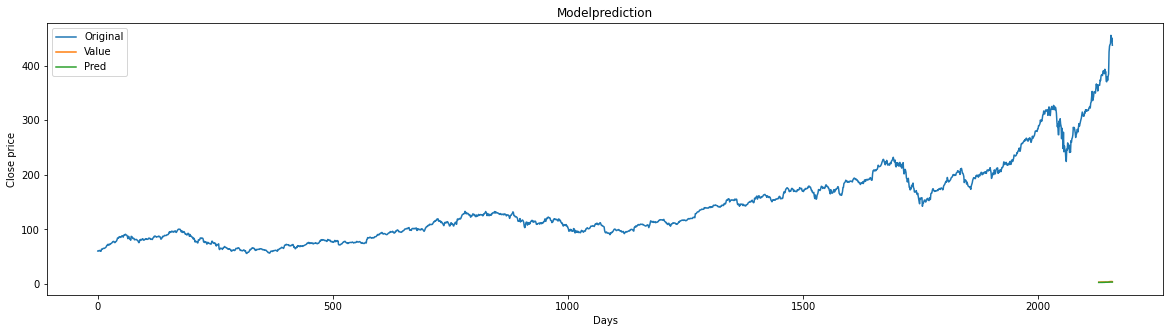

In [43]:
#plot the result
plt.figure(figsize=(20,5))
plt.title("Modelprediction")
plt.xlabel("Days")
plt.ylabel("Close price")

plt.plot(stock_price_df["AAPL"])
plt.plot(df[['Price','Prediction']])


plt.legend(['Original','Value',"Pred"])
plt.show()

In [44]:
#Mini challenge 4
#Alpha=10
model=Ridge(alpha=10)
model.fit(X_train,y_train)

#prediction of future values
ypred=model.predict(x_future)
ypred

#model score
model.score(X_train,y_train)

0.9334846054605634

In [45]:
#Alpha = 20
model=Ridge(alpha=20)
model.fit(X_train,y_train)

#prediction of future values
ypred=model.predict(x_future)
ypred

#model score
model.score(X_train,y_train)


0.9332669423480193

In [46]:
#lpha=40
model=Ridge(alpha=40)
model.fit(X_train,y_train)

#prediction of future values
ypred=model.predict(x_future)
ypred
#model score 
model.score(X_train,y_train)

0.9324434421033313

In [47]:
#By increasing alpha, the model score decreases

In [48]:
#Task 12: Train an LSTM Time series model
price_volume_df = individual_stock(stock_price_df, stock_volume_df, 'AAPL')
price_volume_df

Date       Price    Volume
0     2012-01-12   60.198570  53146800
1     2012-01-13   59.972858  56505400
2     2012-01-17   60.671429  60724300
3     2012-01-18   61.301430  69197800
4     2012-01-19   61.107143  65434600
...          ...         ...       ...
2154  2020-08-05  440.250000  30498000
2155  2020-08-06  455.609985  50607200
2156  2020-08-07  444.450012  49453300
2157  2020-08-10  450.910004  53100900
2158  2020-08-11  437.500000  46871100

[2159 rows x 3 columns]

In [49]:
df=price_volume_df.iloc[:,1:]

In [50]:
#Normalizing the data:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler(feature_range=(0,1))
df = normalizer.fit_transform(np.array(df).reshape(-1,1))

In [51]:
#Defining the test and train data size
train_size = int(len(df)*0.70)
test_size = len(df) - train_size
print(train_size,test_size)

3022 1296


In [52]:
#Splitting the data
df_train, df_test = df[0:train_size,:], df[train_size:len(df),:1]

In [53]:
#Creating dataset in time series for LSTM model 
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [56]:
#Taking 15 days price as one record for training
time_stamp = 15
X_train, y_train = create_ds(df_train,time_stamp)
X_test, y_test = create_ds(df_test,time_stamp)
print(X_train.shape,y_train.shape,X_test.shape, y_test.shape)

(3006, 15) (3006,) (1280, 15) (1280,)


In [57]:
#Reshape the 1D arrays to 3D arrays to feed in the model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [58]:
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)


outputs = keras.layers.Dense(1, activation='linear')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 15, 150)           91200     
                                                                 
 dropout (Dropout)           (None, 15, 150)           0         
                                                                 
 lstm_1 (LSTM)               (None, 15, 150)           180600    
                                                                 
 dropout_1 (Dropout)         (None, 15, 150)           0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [59]:
ypred=model.predict(X_test)
ypred.shape
model=pd.DataFrame({"Actual":y_test.flatten(),"Predicted":ypred.flatten()})
model.head()

Actual  Predicted
0  1.102939e-01  -0.000148
1  3.073328e-07  -0.000177
2  1.039571e-01  -0.000157
3  2.979046e-07  -0.000185
4  1.344922e-01  -0.000156

In [60]:
#Mini challenge 5
#Testing with Amazon
price_volume_df = individual_stock(stock_price_df, stock_volume_df, 'AMZN')
price_volume_df
df=price_volume_df.iloc[:,1:]

In [61]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler(feature_range=(0,1))
df = normalizer.fit_transform(np.array(df).reshape(-1,1))

In [62]:
train_size = int(len(df)*0.70)
test_size = len(df) - train_size


In [63]:
df_train, df_test = df[0:train_size,:], df[train_size:len(df),:1]

In [64]:
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [65]:
time_stamp = 15
X_train, y_train = create_ds(df_train,time_stamp)
X_test, y_test = create_ds(df_test,time_stamp)

In [66]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [67]:
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)

outputs = keras.layers.Dense(1, activation='linear')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

ypred=model.predict(X_test)
ypred.shape
model1=pd.DataFrame({"Actual":y_test.flatten(),"Predicted":ypred.flatten()})
model1.head()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 lstm_3 (LSTM)               (None, 15, 150)           91200     
                                                                 
 dropout_2 (Dropout)         (None, 15, 150)           0         
                                                                 
 lstm_4 (LSTM)               (None, 15, 150)           180600    
                                                                 
 dropout_3 (Dropout)         (None, 15, 150)           0         
                                                                 
 lstm_5 (LSTM)               (None, 150)               180600    
                                                                 
 dense_1 (Dense)             (None, 1)                 151 

Actual  Predicted
0  0.199230   0.005656
1  0.000051   0.006045
2  0.203602   0.005420
3  0.000052   0.005830
4  0.239007   0.005473

In [68]:
#Testing with Tesla
price_volume_df = individual_stock(stock_price_df, stock_volume_df, 'TSLA')
price_volume_df
df=price_volume_df.iloc[:,1:]

In [69]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler(feature_range=(0,1))
df = normalizer.fit_transform(np.array(df).reshape(-1,1))

In [70]:
train_size = int(len(df)*0.70)
test_size = len(df) - train_size

In [71]:
df_train, df_test = df[0:train_size,:], df[train_size:len(df),:1]

In [72]:
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [73]:
time_stamp = 15
X_train, y_train = create_ds(df_train,time_stamp)
X_test, y_test = create_ds(df_test,time_stamp)

In [74]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [75]:
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)

outputs = keras.layers.Dense(1, activation='linear')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

ypred=model.predict(X_test)
ypred.shape
model2=pd.DataFrame({"Actual":y_test.flatten(),"Predicted":ypred.flatten()})
model2.head()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 lstm_6 (LSTM)               (None, 15, 150)           91200     
                                                                 
 dropout_4 (Dropout)         (None, 15, 150)           0         
                                                                 
 lstm_7 (LSTM)               (None, 15, 150)           180600    
                                                                 
 dropout_5 (Dropout)         (None, 15, 150)           0         
                                                                 
 lstm_8 (LSTM)               (None, 150)               180600    
                                                                 
 dense_2 (Dense)             (None, 1)                 151 

Actual  Predicted
0  0.110607   0.001598
1  0.000005   0.001618
2  0.074491   0.001610
3  0.000005   0.001622
4  0.077899   0.001593

In [76]:
#Testing with MGM
price_volume_df = individual_stock(stock_price_df, stock_volume_df, 'MGM')
price_volume_df
df=price_volume_df.iloc[:,1:]

In [77]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler(feature_range=(0,1))
df = normalizer.fit_transform(np.array(df).reshape(-1,1))

In [78]:
train_size = int(len(df)*0.70)
test_size = len(df) - train_size

In [79]:
df_train, df_test = df[0:train_size,:], df[train_size:len(df),:1]

In [80]:
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [81]:
time_stamp = 15
X_train, y_train = create_ds(df_train,time_stamp)
X_test, y_test = create_ds(df_test,time_stamp)

In [82]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [83]:
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)

outputs = keras.layers.Dense(1, activation='linear')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

ypred=model.predict(X_test)
ypred.shape
model3=pd.DataFrame({"Actual":y_test.flatten(),"Predicted":ypred.flatten()})
model3.head()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 lstm_9 (LSTM)               (None, 15, 150)           91200     
                                                                 
 dropout_6 (Dropout)         (None, 15, 150)           0         
                                                                 
 lstm_10 (LSTM)              (None, 15, 150)           180600    
                                                                 
 dropout_7 (Dropout)         (None, 15, 150)           0         
                                                                 
 lstm_11 (LSTM)              (None, 150)               180600    
                                                                 
 dense_3 (Dense)             (None, 1)                 151 

Actual  Predicted
0  8.662208e-02   0.000371
1  3.319711e-07   0.000388
2  7.401472e-02   0.000337
3  3.428482e-07   0.000357
4  1.723563e-01   0.000324